In [1]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 2. Генерация синтетических данных
np.random.seed(42)

HW_proj = pd.DataFrame({
    'user_id': range(1, 21),
    'age': np.random.randint(18, 80, size=20),
    'country': np.random.choice(['RU', 'US', 'FR', 'DE'], size=20),
    'purchases': np.random.randint(0, 10, size=20),
    'revenue': np.random.randint(0, 2000, size=20)
})

# Добавим несколько пропусков и аномалий
HW_proj.loc[2, 'age'] = np.nan
HW_proj.loc[5, 'purchases'] = -1
HW_proj.loc[8, 'revenue'] = 0
HW_proj = pd.concat([HW_proj, HW_proj.iloc[[0]]], ignore_index=True)  # дубликат первой строки

In [3]:
# 3. Проверка качества данных

# 3.1 Пропуски
print("\nДоля пропусков в столбцах:")
print(HW_proj.isna().mean())

# 3.2 Дубликаты
print("\nКоличество дублирующихся строк:")
print(HW_proj.duplicated().sum())

# 3.3 Подозрительные значения
if 'age' in HW_proj.columns:
    print("\nСтроки с подозрительным возрастом (<0 или >100):")
    display(HW_proj[(HW_proj['age'] < 0) | (HW_proj['age'] > 100)])

if 'purchases' in HW_proj.columns:
    print("\nСтроки с отрицательным количеством покупок:")
    display(HW_proj[HW_proj['purchases'] < 0])

if 'revenue' in HW_proj.columns and 'purchases' in HW_proj.columns:
    print("\nСтроки с нулевой или отрицательной выручкой при ненулевых покупках:")
    display(HW_proj[(HW_proj['revenue'] <= 0) & (HW_proj['purchases'] > 0)])



Доля пропусков в столбцах:
user_id      0.000000
age          0.047619
country      0.000000
purchases    0.000000
revenue      0.000000
dtype: float64

Количество дублирующихся строк:
1

Строки с подозрительным возрастом (<0 или >100):


,user_id,age,country,purchases,revenue



Строки с отрицательным количеством покупок:


,user_id,age,country,purchases,revenue
5,6,25.0,US,-1,1478



Строки с нулевой или отрицательной выручкой при ненулевых покупках:


,user_id,age,country,purchases,revenue
8,9,56.0,DE,6,0


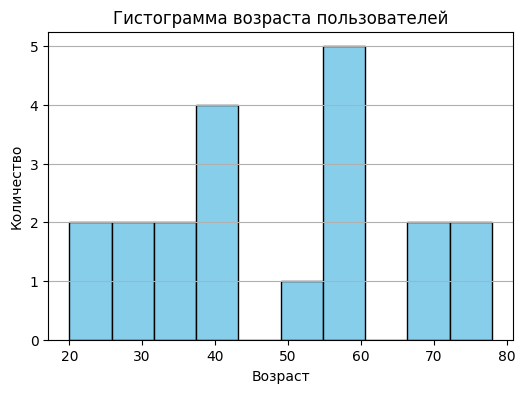

<Figure size 600x400 with 0 Axes>

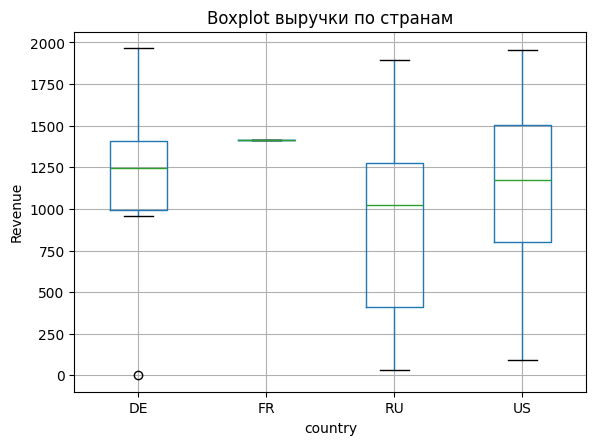

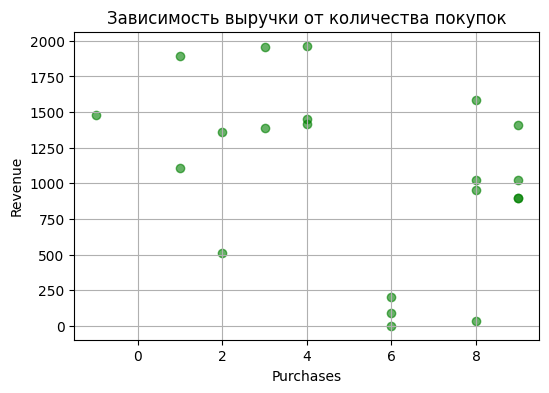

In [4]:
# 4. Визуализация данных

numeric_cols = HW_proj.select_dtypes(include=np.number).columns.tolist()
cat_cols = HW_proj.select_dtypes(include='object').columns.tolist()

# 4.1 Гистограмма для возраста
plt.figure(figsize=(6,4))
plt.hist(HW_proj['age'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Гистограмма возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(axis='y')
plt.show()

# 4.2 Boxplot выручки по странам
plt.figure(figsize=(6,4))
HW_proj.boxplot(column='revenue', by='country')
plt.title('Boxplot выручки по странам')
plt.suptitle('')
plt.ylabel('Revenue')
plt.show()

# 4.3 Scatter plot: покупки vs выручка
plt.figure(figsize=(6,4))
plt.scatter(HW_proj['purchases'], HW_proj['revenue'], c='green', alpha=0.6)
plt.title('Зависимость выручки от количества покупок')
plt.xlabel('Purchases')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [5]:
# 5. Короткие наблюдения о данных
observations = [
    "1. В данных есть пропуски в столбце 'age', их нужно учесть при анализе.",
    "2. Обнаружены дубликаты строк, их следует удалить перед моделированием.",
    "3. Присутствуют отрицательные значения количества покупок и нулевая выручка при ненулевых покупках.",
    "4. Средний возраст пользователей варьируется от 18 до 80 лет.",
    "5. Выручка по странам различается, что видно на боксплоте."
]

print("\nНаблюдения по данным:")
for obs in observations:
    print(obs)


Наблюдения по данным:
1. В данных есть пропуски в столбце 'age', их нужно учесть при анализе.
2. Обнаружены дубликаты строк, их следует удалить перед моделированием.
3. Присутствуют отрицательные значения количества покупок и нулевая выручка при ненулевых покупках.
4. Средний возраст пользователей варьируется от 18 до 80 лет.
5. Выручка по странам различается, что видно на боксплоте.
